In [2]:
import numpy as np
import math
import random
from PIL import Image
import cv2 as cv
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

In [13]:
image = plt.imread("mrbean_input.jpg")
height, width, _ = image.shape

In [14]:
# add noisea
grayimg = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
noise_intensity = 2
for i in range(noise_intensity * 1000):
    col = random.randint(0, width-1)
    row = random.randint(0, height-1)
    if grayimg[row][col] < 70:
        grayimg[row][col] = 255
    elif grayimg[row][col] > 180:
        grayimg[row][col] = 0

cv.imwrite('noisy.jpg', grayimg)

True

In [15]:
# reduce noise
clearimg = np.zeros(image.shape)
clearimg+=255
for i in range(1,height-1):
    for j in range(1, width-1):
        zone = grayimg[i-1:i+2, j-1:j+2]
        clearimg[i][j]= int(np.median(zone))
        
cv.imwrite('cleared.jpg', clearimg)

True

In [5]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [6]:
def alignment_procedure(img, left_eye, right_eye):

    #this function aligns given face in img based on left and right eye coordinates

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #-----------------------

    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #-----------------------
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    #-----------------------

    return img #return img anyway


1/1 [==============================] - 0s 183ms/step


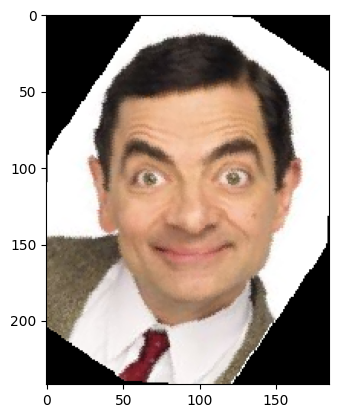

In [8]:
face_detector = MTCNN()
results = face_detector.detect_faces(image)
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

image = alignment_procedure(image, left_eye, right_eye)
plt.imsave('lukame.jpg', image)
plt.imshow(image)